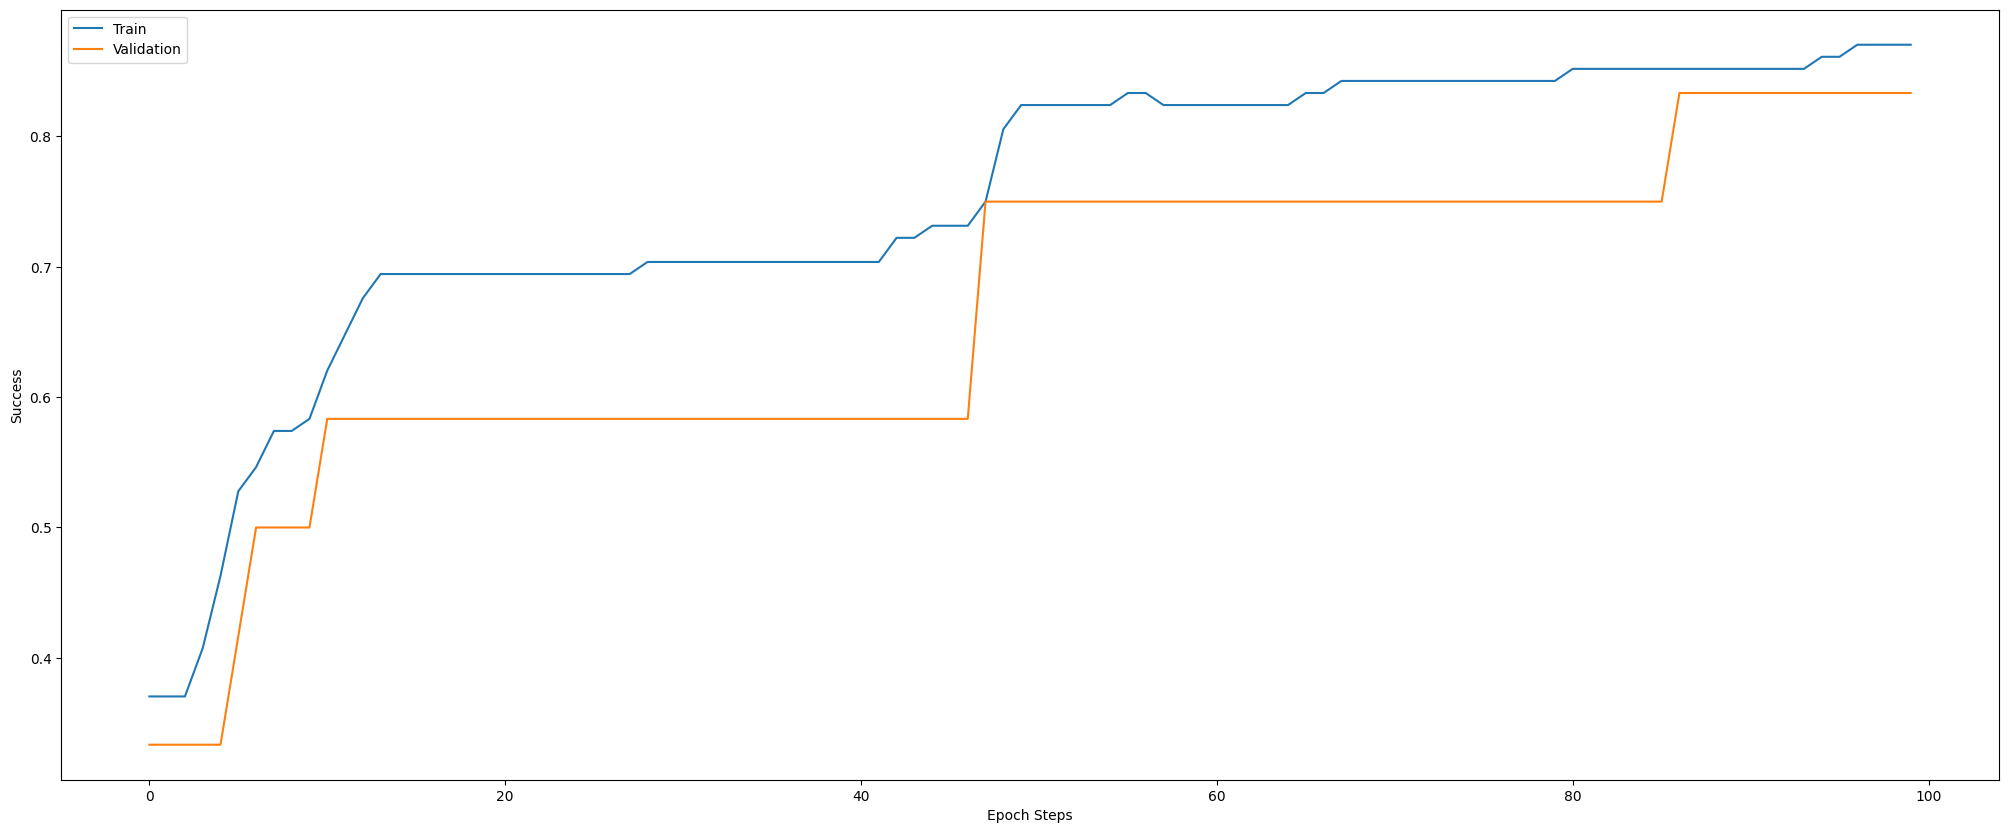

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt



veri=pd.read_csv("/content/iris_species.csv")
veri=veri.drop(columns="Id")

y=veri["Species"]
x=veri.drop(columns="Species")

lb=LabelEncoder()
y=lb.fit_transform(y)

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train, x_val, y_train, y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=0)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_val=sc.fit_transform(x_val)

model=Sequential()
model.add(Dense(10, input_dim=x_train.shape[1], activation="relu"))
model.add(Dense(6, activation="sigmoid"))
model.add(Dense(3, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

output=model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=100, verbose=0)


plt.figure(figsize=(25,10))
plt.plot(output.history["accuracy"])
plt.plot(output.history["val_accuracy"])
plt.ylabel("Success")
plt.xlabel("Epoch Steps")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()